In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler; scaler = MinMaxScaler()
from sklearn.model_selection import validation_curve
from sklearn import metrics
from sklearn.dummy import DummyRegressor
%matplotlib notebook

In [3]:
import warnings
warnings.filterwarnings('ignore')

#warnings.filterwarnings(action='once')

On part d'un dataset contenant le taux de mortalité calculé par tranche d'âge et par sexe, pour chaque pays et pour chaque année. 
Les valeurs manquantes des indicateurs ont été remplacées par la dernière année disponible par pays. Le fichier <i>
data_mort_wb_sub.csv</i> est issu du programme "Traitement base de donnée" et il comprend :
    - une séléction d'années : 16 années (2000 - 2015)
    - tous les pays ayant une correpondance entre le fichier mortalité et le fichier worldbank : 99 pays
    - un type de cancer : C33, C34 (cancer du poumon); implicite - la variable type de cancer n'est pas présente dans le dataset
    - une séléction d'indicateurs : 44 choisis parmis ceux avec moins de 25% de valeurs manquantes

<table><tr><th>Category</th><th>Indicator code</th><th>Indicator description</th></tr><tr><td>Education</td><td>SE.PRM.DURS</td><td>Primary education, duration (years)</td></tr><tr><td>Education</td><td>SE.PRE.DURS</td><td>Preprimary education, duration (years)</td></tr><tr><td>Education</td><td>SE.SEC.DURS</td><td>Secondary education, duration (years)</td></tr><tr><td>Environnement</td><td>SP.URB.TOTL.IN.ZS</td><td>Urban population (% of total)</td></tr><tr><td>Environnement</td><td>SP.URB.GROW</td><td>Urban population growth (annual %)</td></tr><tr><td>Environnement</td><td>AG.SRF.TOTL.K2</td><td>Surface area (sq. km)</td></tr><tr><td>Environnement</td><td>EN.POP.DNST</td><td>Population density (people per sq. km of land area)</td></tr><tr><td>Environnement</td><td>EN.ATM.NOXE.KT.CE</td><td>Nitrous oxide emissions (thousand metric tons of CO2 equivalent)</td></tr><tr><td>Environnement</td><td>EN.ATM.METH.KT.CE</td><td>Methane emissions (kt of CO2 equivalent)</td></tr><tr><td>Environnement</td><td>AG.LND.AGRI.K2</td><td>Agricultural land (sq. km)</td></tr><tr><td>Environnement</td><td>EN.ATM.GHGO.KT.CE</td><td>Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)</td></tr><tr><td>Environnement</td><td>AG.LND.AGRI.ZS</td><td>Agricultural land (% of land area)</td></tr><tr><td>Environnement</td><td>AG.PRD.FOOD.XD</td><td>Food production index (2004-2006 = 100)</td></tr><tr><td>Environnement</td><td>AG.PRD.LVSK.XD</td><td>Livestock production index (2004-2006 = 100)</td></tr><tr><td>Environnement</td><td>AG.PRD.CROP.XD</td><td>Crop production index (2004-2006 = 100)</td></tr><tr><td>Environnement</td><td>EN.ATM.GHGT.KT.CE</td><td>Total greenhouse gas emissions (kt of CO2 equivalent)</td></tr><tr><td>Environnement</td><td>EN.ATM.CO2E.GF.ZS</td><td>CO2 emissions from gaseous fuel consumption (% of total)</td></tr><tr><td>Environnement</td><td>EN.ATM.CO2E.LF.ZS</td><td>CO2 emissions from liquid fuel consumption (% of total)</td></tr><tr><td>Environnement</td><td>EN.ATM.CO2E.SF.ZS</td><td>CO2 emissions from solid fuel consumption (% of total)</td></tr><tr><td>Environnement</td><td>NY.GDP.FRST.RT.ZS</td><td>Forest rents (% of GDP)</td></tr><tr><td>Environnement</td><td>NY.GDP.MINR.RT.ZS</td><td>Mineral rents (% of GDP)</td></tr><tr><td>Environnement</td><td>EN.ATM.CO2E.LF.KT</td><td>CO2 emissions from liquid fuel consumption (kt)</td></tr><tr><td>Environnement</td><td>EN.ATM.METH.AG.KT.CE</td><td>Agricultural methane emissions (thousand metric tons of CO2 equivalent)</td></tr><tr><td>Environnement</td><td>EN.ATM.METH.EG.KT.CE</td><td>Methane emissions in energy sector (thousand metric tons of CO2 equivalent)</td></tr><tr><td>Environnement</td><td>EN.ATM.NOXE.AG.KT.CE</td><td>Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent)</td></tr><tr><td>Environnement</td><td>EN.ATM.NOXE.EG.KT.CE</td><td>Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent)</td></tr><tr><td>Environnement</td><td>NY.GDP.TOTL.RT.ZS</td><td>Total natural resources rents (% of GDP)</td></tr><tr><td>Environnement</td><td>EN.ATM.CO2E.KT</td><td>CO2 emissions (kt)</td></tr><tr><td>Environnement</td><td>EN.ATM.CO2E.PC</td><td>CO2 emissions (metric tons per capita)</td></tr><tr><td>Health</td><td>SP.POP.GROW</td><td>Population growth (annual %)</td></tr><tr><td>Health</td><td>SP.DYN.CBRT.IN</td><td>Birth rate, crude (per 1,000 people)</td></tr><tr><td>Health</td><td>SP.DYN.CDRT.IN</td><td>Death rate, crude (per 1,000 people)</td></tr><tr><td>Health</td><td>SP.DYN.TFRT.IN</td><td>Fertility rate, total (births per woman)</td></tr><tr><td>Health</td><td>SP.ADO.TFRT</td><td>Adolescent fertility rate (births per 1,000 women ages 15-19)</td></tr><tr><td>Health</td><td>SP.DYN.LE00.FE.IN</td><td>Life expectancy at birth, female (years)</td></tr><tr><td>Health</td><td>SP.DYN.LE00.IN</td><td>Life expectancy at birth, total (years)</td></tr><tr><td>Health</td><td>SP.POP.DPND</td><td>Age dependency ratio (% of working-age population)</td></tr><tr><td>Health</td><td>SP.DYN.AMRT.FE</td><td>Mortality rate, adult, female (per 1,000 female adults)</td></tr><tr><td>Health</td><td>SP.DYN.AMRT.MA</td><td>Mortality rate, adult, male (per 1,000 male adults)</td></tr><tr><td>Infrastructure</td><td>IT.CEL.SETS</td><td>Mobile cellular subscriptions</td></tr><tr><td>Infrastructure</td><td>IT.MLT.MAIN</td><td>Fixed telephone subscriptions</td></tr><tr><td>National_accounts</td><td>NY.ADJ.AEDU.GN.ZS</td><td>Adjusted savings: education expenditure (% of GNI)</td></tr><tr><td>National_accounts</td><td>NY.GDP.MKTP.CD</td><td>GDP (current USD)</td></tr><tr><td>National_accounts</td><td>NY.GDP.PCAP.CD</td><td>GDP per capita (current USD)</td></tr>
</table>

In [4]:
df = pd.read_csv('data_mort_wb_sub.csv', header=0,sep=',', low_memory=False)
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.shape

(37264, 49)

In [5]:
df.head()

,Sex,Age_bucket,Year,Country,Mortality_rate,SP.URB.TOTL.IN.ZS,SP.URB.GROW,SP.POP.GROW,SE.PRM.DURS,AG.SRF.TOTL.K2,...,EN.ATM.CO2E.LF.KT,EN.ATM.METH.AG.KT.CE,EN.ATM.METH.EG.KT.CE,EN.ATM.NOXE.AG.KT.CE,EN.ATM.NOXE.EG.KT.CE,NY.GDP.TOTL.RT.ZS,EN.ATM.CO2E.KT,EN.ATM.CO2E.PC,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD
0,2,1,2000,Jamaica,0.0,51.814,1.24118,0.776905,6.0,10990.0,...,9856.896,633.005651,267.408083,361.597144,52.552558,1.762288,10307.937,3.964446,8.929376e+09,3434.249741
1,2,2,2000,Jamaica,0.0,51.814,1.24118,0.776905,6.0,10990.0,...,9856.896,633.005651,267.408083,361.597144,52.552558,1.762288,10307.937,3.964446,8.929376e+09,3434.249741
2,2,3,2000,Jamaica,0.0,51.814,1.24118,0.776905,6.0,10990.0,...,9856.896,633.005651,267.408083,361.597144,52.552558,1.762288,10307.937,3.964446,8.929376e+09,3434.249741
3,2,4,2000,Jamaica,0.0,51.814,1.24118,0.776905,6.0,10990.0,...,9856.896,633.005651,267.408083,361.597144,52.552558,1.762288,10307.937,3.964446,8.929376e+09,3434.249741
4,2,5,2000,Jamaica,0.0,51.814,1.24118,0.776905,6.0,10990.0,...,9856.896,633.005651,267.408083,361.597144,52.552558,1.762288,10307.937,3.964446,8.929376e+09,3434.249741


In [6]:
#vérifier base de données
print( 'Années présentes dans la base : \n', df.Year.unique(), '\n Nombre de pays présents dana la base : \n ',len(df.Country.unique())) 

Années présentes dans la base : 
 [2000 2004 2001 2002 2003 2007 2011 2010 2006 2014 2015 2009 2013 2008 2012
 2005] 
 Nombre de pays présents dana la base : 
  99


In [7]:
df.describe(include='all')

,Sex,Age_bucket,Year,Country,Mortality_rate,SP.URB.TOTL.IN.ZS,SP.URB.GROW,SP.POP.GROW,SE.PRM.DURS,AG.SRF.TOTL.K2,...,EN.ATM.CO2E.LF.KT,EN.ATM.METH.AG.KT.CE,EN.ATM.METH.EG.KT.CE,EN.ATM.NOXE.AG.KT.CE,EN.ATM.NOXE.EG.KT.CE,NY.GDP.TOTL.RT.ZS,EN.ATM.CO2E.KT,EN.ATM.CO2E.PC,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD
count,37264.000000,37264.000000,37264.000000,37264,37264.000000,37264.000000,37264.000000,37264.000000,37264.000000,3.726400e+04,...,37264.000000,37264.000000,37264.000000,37264.000000,37264.000000,37264.000000,3.726400e+04,37264.000000,3.726400e+04,37264.000000
unique,NaN,NaN,NaN,99,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Iceland,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,512,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.499785,8.500000,2007.176900,NaN,50.884518,67.660807,1.252047,0.941133,5.598111,7.703405e+05,...,54828.886922,13984.136053,11711.060676,8487.048283,1015.371724,5.228333,1.350307e+05,7.428462,3.562845e+11,18949.875301
std,0.500007,4.609834,4.243968,NaN,132.585822,18.536914,1.801041,1.599175,0.978053,2.351910e+06,...,98838.565879,36413.930605,39578.386650,19169.799224,1748.023689,10.057098,2.530727e+05,7.631063,7.982917e+11,20487.233315
min,1.000000,1.000000,2000.000000,NaN,0.000000,9.092000,-2.697859,-2.850973,3.000000,1.800000e+02,...,-4781.768000,0.000000,0.000000,0.000000,0.000000,0.000000,2.566900e+01,0.180554,6.310127e+07,329.781984
25%,1.000000,4.750000,2004.000000,NaN,0.000000,54.526000,0.256457,0.181115,5.000000,2.207000e+04,...,4517.744000,621.389299,390.886792,343.508427,60.089197,0.188408,7.425675e+03,2.447997,1.437327e+10,4146.987928
50%,1.000000,8.500000,2007.000000,NaN,1.260432,68.125000,1.045134,0.745507,6.000000,9.303000e+04,...,17341.243000,3221.288138,1768.359209,2390.035148,210.444244,1.192305,4.164612e+04,5.462569,5.713624e+10,10353.447983
75%,2.000000,12.250000,2011.000000,NaN,32.844219,82.220000,1.908281,1.424580,6.000000,3.851780e+05,...,44968.421000,11915.265350,11734.036958,8063.684071,814.288671,4.784801,1.128776e+05,9.299811,2.699801e+11,27726.481054


In [8]:
#variables explicatives quantitatives
indicators = ['SP.URB.TOTL.IN.ZS',	'SP.URB.GROW',	'SP.POP.GROW',	'SE.PRM.DURS',	'AG.SRF.TOTL.K2',	'SE.PRE.DURS',	'EN.POP.DNST',	'SE.SEC.DURS',	'SP.DYN.CBRT.IN',	'SP.DYN.CDRT.IN',	'NY.ADJ.AEDU.GN.ZS',	'SP.DYN.TFRT.IN',	'SP.ADO.TFRT',	'SP.DYN.LE00.FE.IN',	'SP.DYN.LE00.IN',	'SP.POP.DPND',	'SP.DYN.AMRT.FE',	'SP.DYN.AMRT.MA',	'EN.ATM.NOXE.KT.CE',	'EN.ATM.METH.KT.CE',	'AG.LND.AGRI.K2',	'EN.ATM.GHGO.KT.CE',	'AG.LND.AGRI.ZS',	'AG.PRD.FOOD.XD',	'IT.CEL.SETS',	'AG.PRD.LVSK.XD',	'AG.PRD.CROP.XD',	'IT.MLT.MAIN',	'EN.ATM.GHGT.KT.CE',	'EN.ATM.CO2E.GF.ZS',	'EN.ATM.CO2E.LF.ZS',	'EN.ATM.CO2E.SF.ZS',	'NY.GDP.FRST.RT.ZS',	'NY.GDP.MINR.RT.ZS',	'EN.ATM.CO2E.LF.KT',	'EN.ATM.METH.AG.KT.CE',	'EN.ATM.METH.EG.KT.CE',	'EN.ATM.NOXE.AG.KT.CE',	'EN.ATM.NOXE.EG.KT.CE',	'NY.GDP.TOTL.RT.ZS',	'EN.ATM.CO2E.KT',	'EN.ATM.CO2E.PC',	'NY.GDP.MKTP.CD',	'NY.GDP.PCAP.CD']          

#variables explicatives catégorielles : sex, tranche d'age, pays
df["Country_code"] = df["Country"].astype('category').cat.codes
df["Sex"] = df["Sex"].astype('category')
df["Age_bucket"] = df["Age_bucket"].astype('category')

In [9]:
#variable expliquée : taux de mortalité 
y = df['Mortality_rate']
y.describe()

count    37264.000000
mean        50.884518
std        132.585822
min          0.000000
25%          0.000000
50%          1.260432
75%         32.844219
max       1428.571429
Name: Mortality_rate, dtype: float64

<font color="#660066" size=6><u>
SVM pour problème de regression
</font></u>

On compare d'abord les kernels RBF, linéaire et polynomiques sur les features standardisées, avec les paramètres par défaut.

http://scikit-learn.org/stable/modules/svm.html#svm-regression

In [10]:
#découpage des échantillons d'apprentissage et d'évaluation
x = df[indicators + ['Sex', 'Age_bucket', 'Year', 'Country_code']]
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)
#normalisation des features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
X_train_scaled.size

1341504

In [12]:
%%time
#régression SVM avec kernel rbf
from sklearn.svm import SVR
from sklearn import metrics
svr_rbf = SVR(kernel='rbf', gamma='auto', max_iter = -1, cache_size=200)
svr_rbf_fit = svr_rbf.fit(X_train_scaled, y_train) 

print("Précision du régresseur SVM avec kernel rbf sur l'échantillon d'apprentissage : {:.2f}"
     .format(svr_rbf_fit.score(X_train_scaled, y_train)))
print("Précision du régresseur SVM avec kernel rbf sur l'échantillon de test : {:.2f}"
     .format(svr_rbf_fit.score(X_test_scaled, y_test)))

err_train = metrics.mean_squared_error( svr_rbf_fit.predict(X_train_scaled), y_train)**0.5
err_test = metrics.mean_squared_error( svr_rbf_fit.predict(X_test_scaled), y_test)**0.5
print("RMSE du régresseur SVM avec kernel RBF sur l'échantillon d'apprentissage : {:.2f}"
     .format(err_train))
print("RMSE du régresseur SVM avec kernel RBF sur l'échantillon de validation : {:.2f}"
     .format(err_test))  

Précision du régresseur SVM avec kernel rbf sur l'échantillon d'apprentissage : 0.02
Précision du régresseur SVM avec kernel rbf sur l'échantillon de test : 0.02
RMSE du régresseur SVM avec kernel RBF sur l'échantillon d'apprentissage : 130.52
RMSE du régresseur SVM avec kernel RBF sur l'échantillon de validation : 134.02
Wall time: 3min 29s


In [13]:
%%time
#régression SVM avec kernel linéaire
from sklearn.svm import SVR
from sklearn import metrics

svr_lin = SVR(kernel='linear', max_iter = -1, cache_size=200)
svr_lin_fit = svr_lin.fit(X_train_scaled, y_train) 

print("Précision du régresseur SVM avec kernel linéaire sur l'échantillon d'apprentissage : {:.2f}"
     .format(svr_lin_fit.score(X_train, y_train)))
print("Précision du régresseur SVM avec kernel linéaire sur l'échantillon de test : {:.2f}"
     .format(svr_lin_fit.score(X_test_scaled, y_test)))

err_train = metrics.mean_squared_error( svr_lin_fit.predict(X_train_scaled), y_train)**0.5
err_test = metrics.mean_squared_error( svr_lin_fit.predict(X_test_scaled), y_test)**0.5
print("RMSE du régresseur SVC avec kernel linéaire sur l'échantillon d'apprentissage : {:.2f}"
     .format(err_train))
print("RMSE du régresseur SVC avec kernel linéaire sur l'échantillon de test : {:.2f}"
     .format(err_test))      

Précision du régresseur SVM avec kernel linéaire sur l'échantillon d'apprentissage : -83070372130698051584.00
Précision du régresseur SVM avec kernel linéaire sur l'échantillon de test : 0.06
RMSE du régresseur SVC avec kernel linéaire sur l'échantillon d'apprentissage : 127.39
RMSE du régresseur SVC avec kernel linéaire sur l'échantillon de test : 130.84
Wall time: 2min 25s


In [14]:
%%time
#régression SVM avec kernel polynomial
svr_poly = SVR(kernel='poly', degree=2, max_iter = -1, cache_size=200)
svr_poly_fit = svr_poly.fit(X_train_scaled, y_train) 

print("Précision du régresseur SVM avec kernel polynomial sur l'échantillon d'apprentissage : {:.2f}"
     .format(svr_poly_fit.score(X_train_scaled, y_train)))
print("Précision du régresseur SVM avec kernel polynomial sur l'échantillon de test : {:.2f}"
     .format(svr_poly_fit.score(X_test_scaled, y_test)))

err_train = metrics.mean_squared_error( svr_poly_fit.predict(X_train_scaled), y_train)**0.5
err_test = metrics.mean_squared_error( svr_poly_fit.predict(X_test_scaled), y_test)**0.5
print("RMSE du régresseur SVM avec kernel polynomial sur l'échantillon d'apprentissage : {:.2f}"
     .format(err_train))
print("RMSE du régresseur SVM avec kernel polynomial sur l'échantillon de test : {:.2f}"
     .format(err_test))  

Précision du régresseur SVM avec kernel polynomial sur l'échantillon d'apprentissage : -0.07
Précision du régresseur SVM avec kernel polynomial sur l'échantillon de test : -0.07
RMSE du régresseur SVM avec kernel polynomial sur l'échantillon d'apprentissage : 136.17
RMSE du régresseur SVM avec kernel polynomial sur l'échantillon de test : 139.73
Wall time: 2min 40s


## Dummy Regressor
On souhaite comparer nos résultats à un régresseur dummy qui 'prédit' sans prendre en compte les features.
Cela nous sert de base de comparaison pour nos résultats. On compare la stratégie prédiction systématique de la moyenne et prédiction systématique de la médiane.

In [15]:
from sklearn.dummy import DummyRegressor

dummy_median = DummyRegressor(strategy = 'median').fit(X_train, y_train)
dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

err_median_train = metrics.mean_squared_error( dummy_median.predict(X_train_scaled), y_train)**0.5
err_median_test = metrics.mean_squared_error( dummy_median.predict(X_test_scaled), y_test)**0.5

err_mean_train = metrics.mean_squared_error( dummy_median.predict(X_train_scaled), y_train)**0.5
err_mean_test = metrics.mean_squared_error( dummy_median.predict(X_test_scaled), y_test)**0.5

print("Précision du régresseur dummy médiane sur l'échantillon d'apprentissage : {:.2f}"
     .format(dummy_median.score(X_train_scaled, y_train)))
print("Précision du régresseur dummy médiane sur l'échantillon de test : {:.2f}"
     .format(dummy_median.score(X_test_scaled, y_test)))
print("RMSE du régresseur dummy médiane sur l'échantillon d'apprentissage : {:.2f}"
     .format(err_median_train))
print("RMSE du régresseur dummy médiane sur l'échantillon de test : {:.2f}"
     .format(err_median_test))  
print('\n')
print("Précision du régresseur dummy moyenne sur l'échantillon d'apprentissage : {:.2f}"
     .format(dummy_mean.score(X_train_scaled, y_train)))
print("Précision du régresseur dummy moyenne sur l'échantillon de test : {:.2f}"
     .format(dummy_mean.score(X_test_scaled, y_test)))
print("RMSE du régresseur dummy moyenne sur l'échantillon d'apprentissage : {:.2f}"
     .format(err_mean_train))
print("RMSE du régresseur dummy moyenne sur l'échantillon de test : {:.2f}"
     .format(err_mean_test)) 

Précision du régresseur dummy médiane sur l'échantillon d'apprentissage : -0.14
Précision du régresseur dummy médiane sur l'échantillon de test : -0.14
RMSE du régresseur dummy médiane sur l'échantillon d'apprentissage : 140.65
RMSE du régresseur dummy médiane sur l'échantillon de test : 144.24


Précision du régresseur dummy moyenne sur l'échantillon d'apprentissage : 0.00
Précision du régresseur dummy moyenne sur l'échantillon de test : -0.00
RMSE du régresseur dummy moyenne sur l'échantillon d'apprentissage : 140.65
RMSE du régresseur dummy moyenne sur l'échantillon de test : 144.24


On voit qu'avec les options par défaut, nos résultats sont mauvais, ils se rapporchent beaucoup des résultats donnés si on avait 'prédit' systématiquemnt la moyenne ou la médiane, sans même prendre en compte les features.

On veut voir maintenant si en cherchant à optimiser les paramètres il est possible d'améliorer nos scores.

C - paramètre de régularisation qui contrôle la pénalité imposée sur les observations en déhors d'une marge fixée. 
Plus C accroît, plus le modèle essaie de coller aux observations le mieux possible, donc il y a moins de régularization et le modèle est susceptible de surapprendre. 

gamma - paramètre largeur du kernel qui contrôle l'influence des points individuels. Plus gamma accroît, plus les points éloignés de la frontière de décision ont un poids plus important, ce qui fait que la ligne qui sépare les points est proche des points, donc moins lisse. Pour des valeurs élevées de gamma, le paramètre C a moins d'importance.

In [16]:
%%time
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1, 10]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVR(kernel='rbf', max_iter=10**3, cache_size=500), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Scores obtenus pour les combinaisons de paramètres:")
print()
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()  
print()
print('Meilleurs résultats obtenus pour les paramètres : ',grid_search.best_params_ )

Scores obtenus pour les combinaisons de paramètres:

-0.796 (+/-0.220) for {'C': 0.001, 'gamma': 0.001}
-0.796 (+/-0.220) for {'C': 0.001, 'gamma': 0.01}
-0.796 (+/-0.220) for {'C': 0.001, 'gamma': 0.1}
-0.794 (+/-0.218) for {'C': 0.001, 'gamma': 1}
-0.768 (+/-0.202) for {'C': 0.001, 'gamma': 10}
-0.796 (+/-0.220) for {'C': 0.01, 'gamma': 0.001}
-0.796 (+/-0.220) for {'C': 0.01, 'gamma': 0.01}
-0.795 (+/-0.220) for {'C': 0.01, 'gamma': 0.1}
-0.792 (+/-0.218) for {'C': 0.01, 'gamma': 1}
-0.768 (+/-0.202) for {'C': 0.01, 'gamma': 10}
-0.796 (+/-0.220) for {'C': 0.1, 'gamma': 0.001}
-0.794 (+/-0.220) for {'C': 0.1, 'gamma': 0.01}
-0.779 (+/-0.217) for {'C': 0.1, 'gamma': 0.1}
-0.775 (+/-0.215) for {'C': 0.1, 'gamma': 1}
-0.767 (+/-0.201) for {'C': 0.1, 'gamma': 10}
-0.794 (+/-0.220) for {'C': 1, 'gamma': 0.001}
-0.773 (+/-0.216) for {'C': 1, 'gamma': 0.01}
-0.631 (+/-0.191) for {'C': 1, 'gamma': 0.1}
-0.611 (+/-0.185) for {'C': 1, 'gamma': 1}
-0.751 (+/-0.206) for {'C': 1, 'gamma': 10}
-0

In [17]:
%%time
#régression SVM avec kernel rbf avec paramètres optimaux
from sklearn.svm import SVR
from sklearn import metrics
svr_rbf = SVR(kernel='rbf', C=100, gamma=1, max_iter = -1, cache_size=500)
svr_rbf_fit = svr_rbf.fit(X_train_scaled, y_train) 

print("Précision du régresseur SVM avec kernel rbf sur l'échantillon d'apprentissage : {:.2f}"
     .format(svr_rbf_fit.score(X_train_scaled, y_train)))
print("Précision du régresseur SVM avec kernel rbf sur l'échantillon de test : {:.2f}"
     .format(svr_rbf_fit.score(X_test_scaled, y_test)))

err_train = metrics.mean_squared_error( svr_rbf_fit.predict(X_train_scaled), y_train)**0.5
err_test = metrics.mean_squared_error( svr_rbf_fit.predict(X_test_scaled), y_test)**0.5
print("RMSE du régresseur SVM avec kernel RBF sur l'échantillon d'apprentissage : {:.2f}"
     .format(err_train))
print("RMSE du régresseur SVM avec kernel RBF sur l'échantillon de test : {:.2f}"
     .format(err_test))  

Précision du régresseur SVM avec kernel rbf sur l'échantillon d'apprentissage : 0.73
Précision du régresseur SVM avec kernel rbf sur l'échantillon de test : 0.71
RMSE du régresseur SVM avec kernel RBF sur l'échantillon d'apprentissage : 68.63
RMSE du régresseur SVM avec kernel RBF sur l'échantillon de test : 72.51
Wall time: 4min 33s


<IPython.core.display.Javascript object>


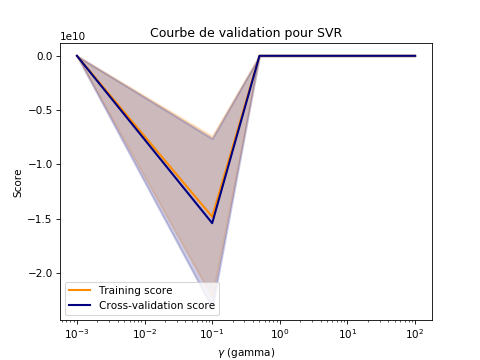

Wall time: 8min 43s


In [21]:
%%time
#Courbe de validation de gamma pour le C optimal
from sklearn.svm import SVR
param_range = [0.001, 0.1, 0.5, 1, 5, 10, 100]
train_scores, test_scores = validation_curve(SVR(C=100, max_iter=10**3, kernel='rbf', cache_size=200), x, y,
                                            param_name='gamma',
                                            param_range=param_range, cv=5)
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Courbe de validation pour SVR')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

On a voulu illustrer la sensibilité du score au choix du paramètre gamma.
Ce graphique nous montre que le score est très proche de 0 systématiquement, aussi bien pour l'échantillon de validation comme pour celui de test. Encore, pour certaines plages de gamma, les performances sont arbitrairement pires qu'un modèle aléatoire, donc le score est négatif.

On conclut que le modèle SVM n'arrive pas à bien expliquer la mortalité du cancer des poumons.

## Prédictions avec modèle SVM
On souhaite comparer nos résultats à un régresseur dummy qui 'prédit' sans prendre en compte les features.
Cela nous sert de base de comparaison pour nos résultats.

In [22]:
#lecture base de données à prédire
df_pred = pd.read_csv('data_pred_wb.csv', sep=',', low_memory=False)
df_pred = df_pred[df_pred['Age_group'] !='80UP']
df_pred.head()

,Unnamed: 0,Country,Year,Age_group,Sex,Population,area,year,SP.URB.TOTL.IN.ZS,SP.URB.GROW,...,EN.ATM.CO2E.LF.KT,EN.ATM.METH.AG.KT.CE,EN.ATM.METH.EG.KT.CE,EN.ATM.NOXE.AG.KT.CE,EN.ATM.NOXE.EG.KT.CE,NY.GDP.TOTL.RT.ZS,EN.ATM.CO2E.KT,EN.ATM.CO2E.PC,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD
0,0,Aruba,2000,1,2,3413.0,Aruba,2000,46.717,1.187344,...,2321.211,0.800714,1.030635,0.746749,1.329305,0.000703,2321.211,25.547679,1.873453e+09,20619.56585
1,1,Aruba,2000,1,1,3565.0,Aruba,2000,46.717,1.187344,...,2321.211,0.800714,1.030635,0.746749,1.329305,0.000703,2321.211,25.547679,1.873453e+09,20619.56585
2,2,Aruba,2000,2,2,3598.0,Aruba,2000,46.717,1.187344,...,2321.211,0.800714,1.030635,0.746749,1.329305,0.000703,2321.211,25.547679,1.873453e+09,20619.56585
3,3,Aruba,2000,2,1,3714.0,Aruba,2000,46.717,1.187344,...,2321.211,0.800714,1.030635,0.746749,1.329305,0.000703,2321.211,25.547679,1.873453e+09,20619.56585
4,4,Aruba,2000,3,2,3375.0,Aruba,2000,46.717,1.187344,...,2321.211,0.800714,1.030635,0.746749,1.329305,0.000703,2321.211,25.547679,1.873453e+09,20619.56585


In [23]:
#variables explicatives catégorielles : sex, tranche d'age, pays
df_pred["Country_code"] = df_pred["Country"].astype('category').cat.codes
df_pred["Sex"] = df_pred["Sex"].astype('category')
df_pred["Age_group"] = df_pred["Age_group"].astype('category')

In [24]:
#normalisation des features
X_train_pred = scaler.fit_transform(df_pred[indicators + ['Sex', 'Age_group', 'Year', 'Country_code']])

In [25]:
#utiliser le modèle entrainé pour prédire
Y_pred = svr_rbf_fit.predict(X_train_pred)

In [26]:
#déscription des données prédites
print("Caractéristiques des taux prédits :")
print('Minimum : ', Y_pred.min()) 
print('Maximum : ',Y_pred.max())
print('Moyenne : ',Y_pred.mean())
print('Médiane : ',np.median(Y_pred))
print('Écart-type : ',Y_pred.std())

Caractéristiques des taux prédits :
Minimum :  -18.9295254659
Maximum :  597.832728369
Moyenne :  37.6495718794
Médiane :  18.3642522048
Écart-type :  57.4187560472


In [27]:
#déscription des données originales
print("Caractéristiques des taux observés sur l'échantillon de test :")
print('Minimum : ', y_test.min()) 
print('Maximum : ', y_test.max())
print('Moyenne : ', y_test.mean())
print('Médiane : ', np.median(y_test))
print('Écart-type : ', y_test.std())

Caractéristiques des taux observés sur l'échantillon de test :
Minimum :  0.0
Maximum :  1341.35853094
Moyenne :  51.91432140999463
Médiane :  1.19036813858
Écart-type :  135.07089008534817
